# Importing Libraries

In [1]:
import torch
#from torch import nn
#import torch.nn.functional as F
from torchvision import datasets, transforms

#import numpy as np

#import requests

import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from PIL import Image, ImageOps

#import reprlib
import sys

# Configuring Visualization Parameters

In [2]:
%matplotlib inline

In [3]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [4]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": .8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI,
}

mpl.rcParams.update(custom_params)

# Configuring Other Notebook Parameters

In [5]:
#reprlib_rules = reprlib.Repr()
#reprlib_rules.maxother = 250

# Pre-installing Custom Functions

In [6]:
sys.path.append("../")

In [7]:
from Modules import *

In [8]:
def im_convert(tensor):
    image = tensor.cpu().clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image

# Practicing in Stages

## Testing LeNet

In [9]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

training_dataset = datasets.CIFAR10(root="../Datasets",
                                    train=True,
                                    download=True,
                                    transform=transform)

validation_dataset = datasets.CIFAR10(root="../Datasets",
                                      train=False,
                                      download=True,
                                      transform=transform)

training_loader = torch.utils.data.DataLoader(training_dataset,
                                              batch_size=100,
                                              shuffle=True)

validation_loader = torch.utils.data.DataLoader(validation_dataset,
                                                batch_size=100,
                                                shuffle=False)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Loading and transformation of the CIFAR-10 training and validation datasets"
)

statements = [
    """
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

training_dataset = datasets.CIFAR10(root="../Datasets",
                                    train=True,
                                    download=True,
                                    transform=transform)

validation_dataset = datasets.CIFAR10(root="../Datasets",
                                      train=False,
                                      download=True,
                                      transform=transform)

training_loader = torch.utils.data.DataLoader(training_dataset,
                                              batch_size=100,
                                              shuffle=True)

validation_loader = torch.utils.data.DataLoader(validation_dataset,
                                                batch_size=100,
                                                shuffle=False)
"""
]
tabulation.statement_generator(statements)

variables = [
    "transform",
    "training_dataset",
    "validation_dataset",
]
values = [
    str(transform),
    str(training_dataset),
    str(validation_dataset),
]
tabulation.variable_generator(variables, values)

expressions = [
    "len(training_loader)", "len(training_loader.dataset)",
    "list(training_loader)[0][0].shape", "list(training_loader)[0][1].shape",
    "next(iter(training_loader))[0].shape",
    "next(iter(training_loader))[1].shape", "len(validation_loader)",
    "len(validation_loader.dataset)", "list(validation_loader)[0][0].shape",
    "list(validation_loader)[0][1].shape",
    "next(iter(validation_loader))[0].shape",
    "next(iter(validation_loader))[1].shape"
]
results = [
    str(len(training_loader)),
    str(len(training_loader.dataset)),
    str(list(training_loader)[0][0].shape),
    str(list(training_loader)[0][1].shape),
    str(next(iter(training_loader))[0].shape),
    str(next(iter(training_loader))[1].shape),
    str(len(validation_loader)),
    str(len(validation_loader.dataset)),
    str(list(validation_loader)[0][0].shape),
    str(list(validation_loader)[0][1].shape),
    str(next(iter(validation_loader))[0].shape),
    str(next(iter(validation_loader))[1].shape),
]
tabulation.expression_generator(expressions, results, 12)

Files already downloaded and verified
Files already downloaded and verified
Loading and transformation of the CIFAR-10 training and validation datasets

    +-------------------------------------------------------------+
    | Statement                                                   |
    +-------------------------------------------------------------+
    | transform = transforms.Compose([                            |
    |     transforms.Resize((32, 32)),                            |
    |     transforms.ToTensor(),                                  |
    |     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  |
    | ])                                                          |
    |                                                             |
    | training_dataset = datasets.CIFAR10(root="../Datasets",     |
    |                                     train=True,             |
    |                                     download=True,          |
    |                          

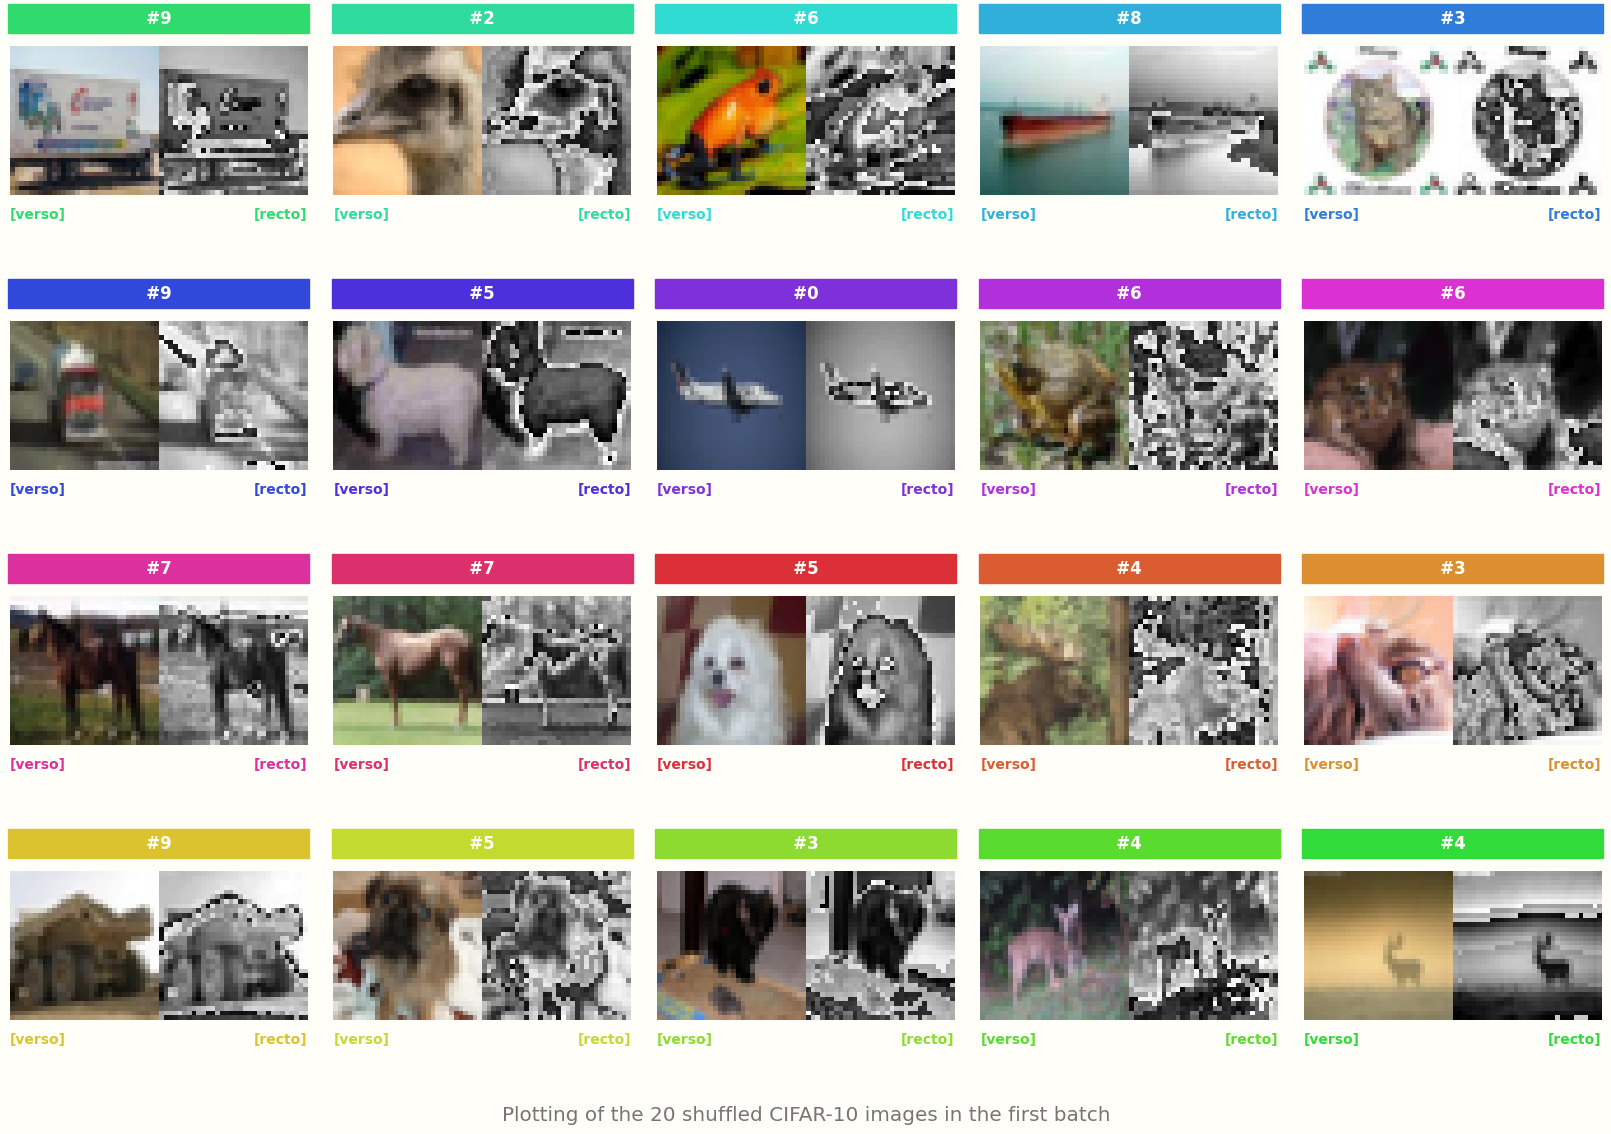

In [10]:
def tensor_to_image(tensor):
    transform = transforms.ToPILImage()
    return transform(tensor)


def grayscale_image(tensor):
    transform = transforms.Grayscale()

    image = tensor_to_image(tensor)
    return transform(image)


def grayscale_image_conversion(tensor):
    transform = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, ), (0.5, ))
    ])

    image = grayscale_image(tensor)
    image = ImageOps.invert(image)
    new_tensor = transform(image)
    array = new_tensor.clone().detach().numpy()
    array = array.transpose(1, 2, 0)
    array = array.reshape(array.shape[0], array.shape[1], -1)
    array = array * 0.5 + 0.5
    array = array.clip(0, 1)
    return array


colors = calm_color_generator(20)
fig = plt.figure(figsize=(figure_size[0], figure_size[1] / 9 * 11),
                 constrained_layout=True)

gs = gridspec.GridSpec(nrows=4, ncols=5, figure=fig, wspace=.08, hspace=None)

dataiter = iter(training_loader)
images, labels = next(dataiter)

for idx in np.arange(20):
    bgcolor = colors.pop(0)
    ax = fig.add_subplot(gs[idx // 5, idx % 5],
                         xticks=[],
                         yticks=[],
                         frameon=False)
    spaces = " " * 23
    ax.set_title("{}#{}{}".format(spaces, str(labels[idx].item()), spaces),
                 loc="center",
                 pad=0,
                 backgroundcolor=bgcolor,
                 color=plt.rcParams["axes.facecolor"],
                 fontweight="heavy")

    axins1 = inset_axes(ax,
                        width="50%",
                        height="75%",
                        loc="upper left",
                        borderpad=0)
    axins1.set(xticks=[], yticks=[], frame_on=False)
    axins1.imshow(im_convert(images[idx]))
    axins1.set_xlabel("[verso]",
                      loc="left",
                      labelpad=5,
                      color=bgcolor,
                      fontweight="bold")

    axins2 = inset_axes(ax,
                        width="50%",
                        height="75%",
                        loc="upper right",
                        borderpad=0)
    axins2.set(xticks=[], yticks=[], frame_on=False)
    axins2.imshow(grayscale_image_conversion(images[idx]), cmap="binary")
    axins2.set_xlabel("[recto]",
                      loc="right",
                      labelpad=5,
                      color=bgcolor,
                      fontweight="bold")

fig.suptitle("Plotting of the 20 shuffled CIFAR-10 images in the first batch",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.show()